In [1]:
from Controller import TrainingController, ExplainingController
from Utils.SaveUtils import load_parameters
from Parameters import TrainingParameters, PredictingParameters
from Parameters.Enums import NumericalPermutationStrategies
import tensorflow as tf
from IPython.core.display import display, HTML
import json
import numpy as np


In [2]:
folder_path = "./SavedModels/%s" % (
"0.7700_Diabetes_BaseNNModel_2021-05-30 04:41:24.179089"
)   

In [3]:
parameters_json = load_parameters(folder_path=folder_path)
parameters = TrainingParameters(**parameters_json)
tf.random.set_seed(parameters.dataset_split_seed)
np.random.seed(parameters.dataset_split_seed)
parameters.load_model_folder_path = folder_path
predicting_parameters = PredictingParameters()
predicting_parameters.load_model_folder_path = folder_path

In [4]:
trainer = TrainingController(parameters=parameters)


| Running on /job:localhost/replica:0/task:0/device:CPU:0  

| Load mean and variance 

| Model loaded successfully from: ./SavedModels/0.7700_Diabetes_BaseNNModel_2021-05-30 04:41:24.179089  


In [5]:
explainer = ExplainingController(parameters=parameters, predicting_parameters = predicting_parameters)


| Running on /job:localhost/replica:0/task:0/device:CPU:0  

| Model loaded successfully from: ./SavedModels/0.7700_Diabetes_BaseNNModel_2021-05-30 04:41:24.179089  


In [6]:
########### Get example data from trainer ###########
unbatch_test = trainer.test_dataset.unbatch()
print("Test set length: %d" %(len(list(unbatch_test.as_numpy_iterator()))))
index_from_test = 20

Test set length: 100


In [7]:
example_data = trainer.dataset.collate_fn([list(unbatch_test.as_numpy_iterator())[index_from_test]])[0]

In [8]:
recommended_var, cross_boundary_df =  explainer.get_recommended_variance(example_data, variance=0.1, max_steps=50)

In [9]:
cross_boundary_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted_Value,Outcome,Current_Step,Step_Feature,Step_Direction,Distance
1,-1.148102,1.564319,0.314183,-1.320694,-0.709347,-1.794686,0.193051,-0.596361,0.902745,True,22,Glucose,Plus,2.2


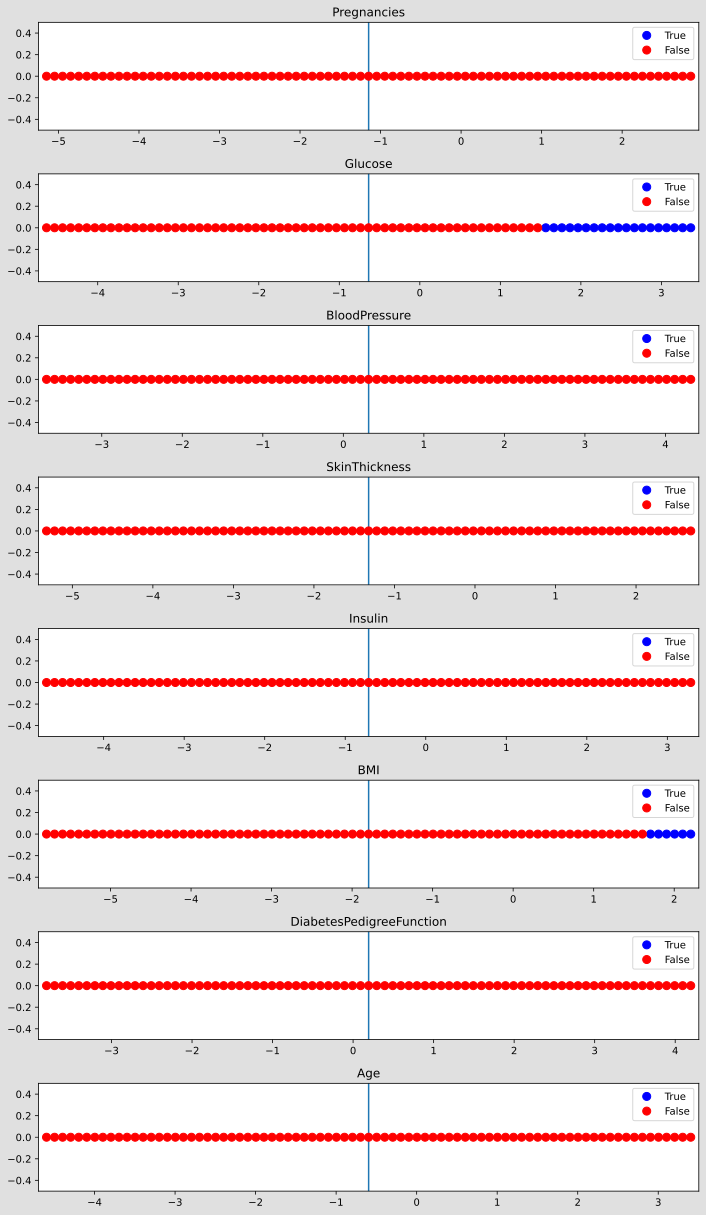

In [10]:
explainer.medical_check_boundary(example_data, variance=0.1, steps= 40)

In [11]:
############ Generate original exaplaination ############
cat_df, predicted_value, bn, bn_html, inference, infoBN, markov_blanket_html= explainer.medical_predict_lindaBN_explain(example_data,2000,variance=0.1, permutations_strategy= NumericalPermutationStrategies.Single_Feature_Unifrom,clip_permutation=True, using_qcut=True) 
generated_html = explainer.generate_html_page_from_graphs(json.dumps(example_data.numpy().tolist()), str(predicted_value), bn_html, inference, infoBN, markov_blanket_html)
display(HTML(generated_html))


| Selecting Greedy Hill Climbing Algorithm 


In [12]:
############ Generate exaplaination with suggested variance ############
cat_df, predicted_value, bn, bn_html, inference, infoBN, markov_blanket_html= explainer.medical_predict_lindaBN_explain(example_data,2000,variance=recommended_var, permutations_strategy= NumericalPermutationStrategies.Cube_All_Dim_Normal,clip_permutation=False, using_qcut=True) 

generated_html = explainer.generate_html_page_from_graphs(json.dumps(example_data.numpy().tolist()), str(predicted_value), bn_html, inference, infoBN, markov_blanket_html)
display(HTML(generated_html))


| Selecting Greedy Hill Climbing Algorithm 
